In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(r'C:\Studia\Master\ML2\Projects')

In [3]:
data = pd.read_csv(r'data\r2.csv')

In [4]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=777)

Let's take a look how the data looks like

In [190]:
df_train.head()

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
901,902,11.9,0.113,0.66,0.98642,0.797174,0.213847,0.939548,0.447811,0.921580,0.894356,0.411423,0.712614,0.912402,0.830460,11.5,5.0,3.23,5.398293,2.3,4.53,6.0,0.360
201,202,10.3,0.082,0.05,1.00808,0.656672,0.915705,0.890378,0.591510,0.564350,0.661537,0.568183,0.624814,0.943377,0.442068,7.3,5.0,3.43,4.598898,5.6,4.52,15.0,0.875
993,994,10.1,0.105,0.03,0.98500,0.454308,0.904415,0.016579,0.731198,0.991930,0.903199,0.599075,0.200425,0.854436,0.104589,7.7,27.0,3.38,4.524576,1.7,4.54,99.0,0.580
1265,1266,9.1,0.107,0.00,1.00675,0.960360,0.847387,0.574455,0.667381,0.759338,0.145057,0.510136,0.603987,0.808008,0.998095,7.4,16.0,3.40,5.633795,1.8,4.58,40.0,0.640
1226,1227,9.2,0.109,0.17,0.98800,0.553701,0.326269,0.195162,0.629140,0.715409,0.061373,0.609831,0.233357,0.642675,0.245426,8.8,23.0,3.12,4.078569,2.8,4.52,119.0,0.620


At he first glance I can spot a 10 new features added. Let's check missing data and data types.

In [191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 901 to 103
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1120 non-null   int64  
 1   alcohol               1120 non-null   float64
 2   chlorides             1120 non-null   float64
 3   citric acid           1120 non-null   float64
 4   density               1120 non-null   float64
 5   feat01                1120 non-null   float64
 6   feat02                1120 non-null   float64
 7   feat03                1120 non-null   float64
 8   feat04                1120 non-null   float64
 9   feat05                1120 non-null   float64
 10  feat06                1120 non-null   float64
 11  feat07                1120 non-null   float64
 12  feat08                1120 non-null   float64
 13  feat09                1120 non-null   float64
 14  feat10                1120 non-null   float64
 15  fixed acidity       

We have complete dataset without nulls - that's very good. Let's take a closer look on our data.

In [192]:
df_train.describe()

,id,alcohol,chlorides,citric acid,density,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,693.181250,10.438676,0.088082,0.268446,0.996689,0.513122,0.497233,0.500842,0.565367,0.512058,0.495617,0.532403,0.486819,0.484618,0.507766,8.501071,17.796875,3.339473,5.685705,2.449732,4.656732,45.985714,0.532295
std,406.824412,1.085687,0.051743,0.193294,0.008336,0.287470,0.288347,0.293744,0.145339,0.293186,0.290507,0.154185,0.289768,0.282033,0.291891,1.709146,10.099905,0.153436,1.240531,1.404393,0.174834,33.396129,0.180724
min,1.000000,8.400000,0.002000,0.000000,0.980640,0.004110,0.000363,0.000349,0.000000,0.000021,0.000036,0.035056,0.000597,0.001477,0.001185,4.900000,3.000000,2.770000,1.779748,1.100000,4.330000,4.000000,0.100000
25%,332.750000,9.600000,0.068000,0.090000,0.988075,0.268165,0.254381,0.248796,0.471932,0.255674,0.243983,0.432329,0.228564,0.249277,0.260922,7.300000,9.000000,3.240000,4.878094,1.800000,4.550000,22.000000,0.390000
50%,694.500000,10.200000,0.079000,0.260000,0.996700,0.523564,0.486564,0.493026,0.563944,0.520990,0.500038,0.531557,0.496547,0.485008,0.507829,8.100000,16.000000,3.340000,5.698321,2.100000,4.620000,37.000000,0.520000
75%,1046.250000,11.100000,0.092000,0.420000,1.005463,0.759314,0.754083,0.768040,0.667452,0.764853,0.743463,0.630128,0.732888,0.708388,0.766980,9.400000,24.000000,3.430000,6.487978,2.500000,4.730000,62.000000,0.640000
max,1399.000000,15.000000,0.611000,1.000000,1.013150,0.999564,0.999118,0.999650,0.967541,0.997623,0.997389,1.000000,0.998726,0.999335,0.999402,16.100000,74.000000,4.040000,10.545302,15.400000,6.000000,287.000000,1.330000


It seems like the additional features are continuous and rescaled around [0;1].

In [193]:
df_train.loc[:, df_train.columns].duplicated().sum()

0

In [194]:
df = df_train.drop('id', axis=1)

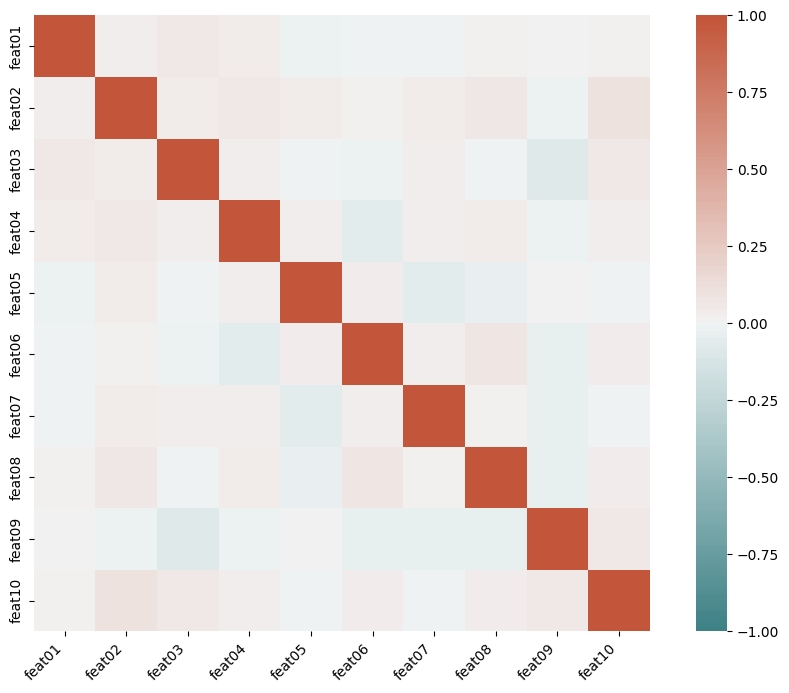

In [195]:
# Plotting correlation matrix for all additional columns
df_corr = df.iloc[:, 4:14]
corr = df_corr.corr(method = 'spearman')
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(200, 20, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

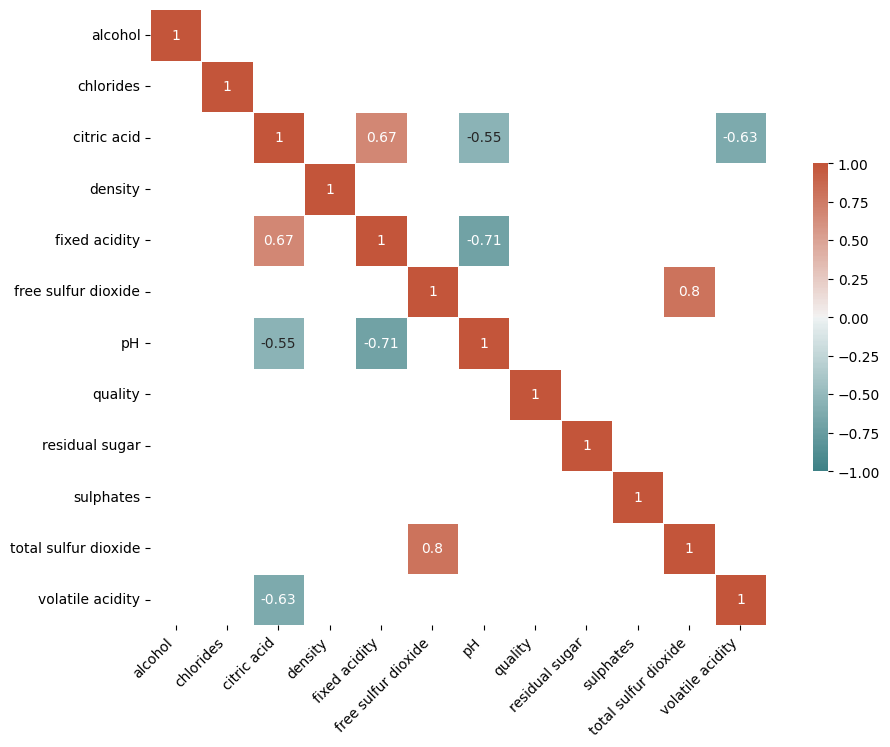

In [196]:
df_corr = df.drop(df.iloc[:, 4:14].columns, axis=1)

corr = df_corr.corr(method = 'spearman')
mask = np.abs(corr) < 0.5

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 20, n=200)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)  

plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)  

plt.show()

We can observe that some of the variables are highly correlated. However, most of the strong relationships can be easily explained. For example, pH is negatively correlated with fixed acidity, which is obvious knowing elementary chemistry. Also, free sulfur dioxide and total sulfur dioxide are highly correlated because both are forms of sulfur. One thing I wouldn't be so sure about is the negative correlation between volatile acidity and citric acid. The negative relationship is interesting, as both are acids; however, I don't have enough knowledge to state whether it is correct or not, thus I'll leave it for now.

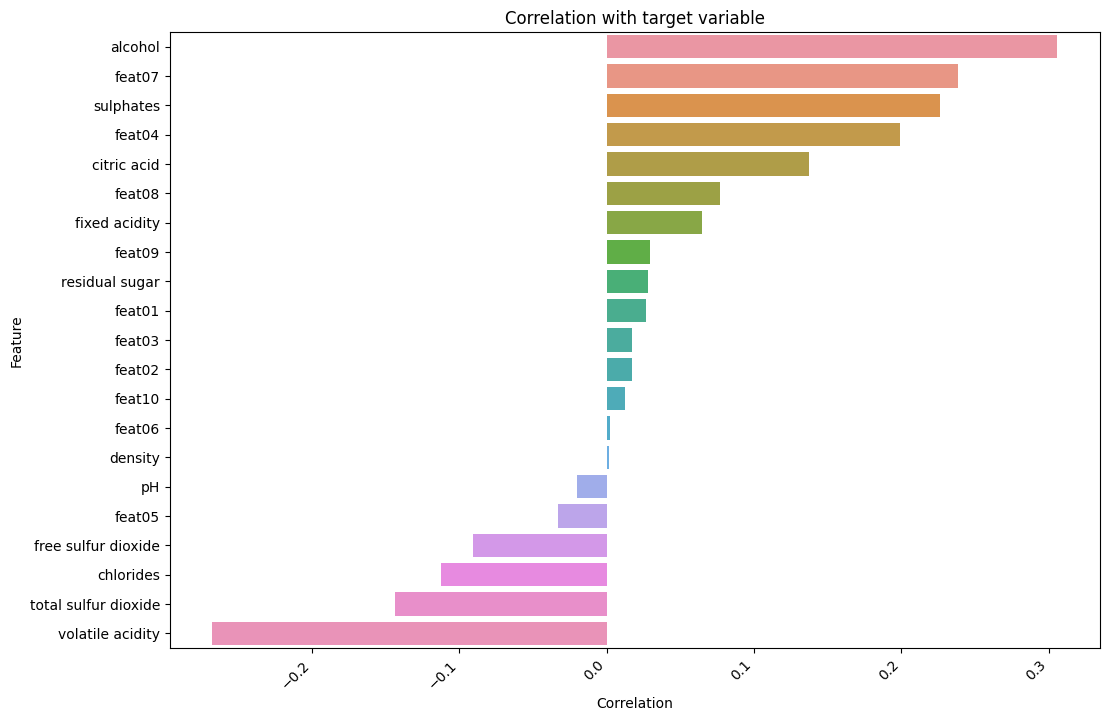

alcohol                 0.305882
feat07                  0.238149
sulphates               0.226293
feat04                  0.199298
citric acid             0.137399
feat08                  0.076884
fixed acidity           0.064393
feat09                  0.029100
residual sugar          0.028273
feat01                  0.026723
feat03                  0.017369
feat02                  0.017030
feat10                  0.012462
feat06                  0.002269
density                 0.001902
pH                     -0.019926
feat05                 -0.033350
free sulfur dioxide    -0.090653
chlorides              -0.112355
total sulfur dioxide   -0.143428
volatile acidity       -0.267891
Name: quality, dtype: float64


In [197]:
correlation_series = df.corr(method = 'spearman')['quality']
correlation_series = correlation_series.drop('quality').sort_values(ascending=False)

# plotting the correlations with target variable
plt.figure(figsize=(12, 8))

sns.barplot(x=correlation_series.values, y=correlation_series.index)

plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)

plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation with target variable')

plt.show()
print(correlation_series)

Interestingly, feat 04 and feat 07 are positively correlated with target variable   

Let's look at the distributions.
    

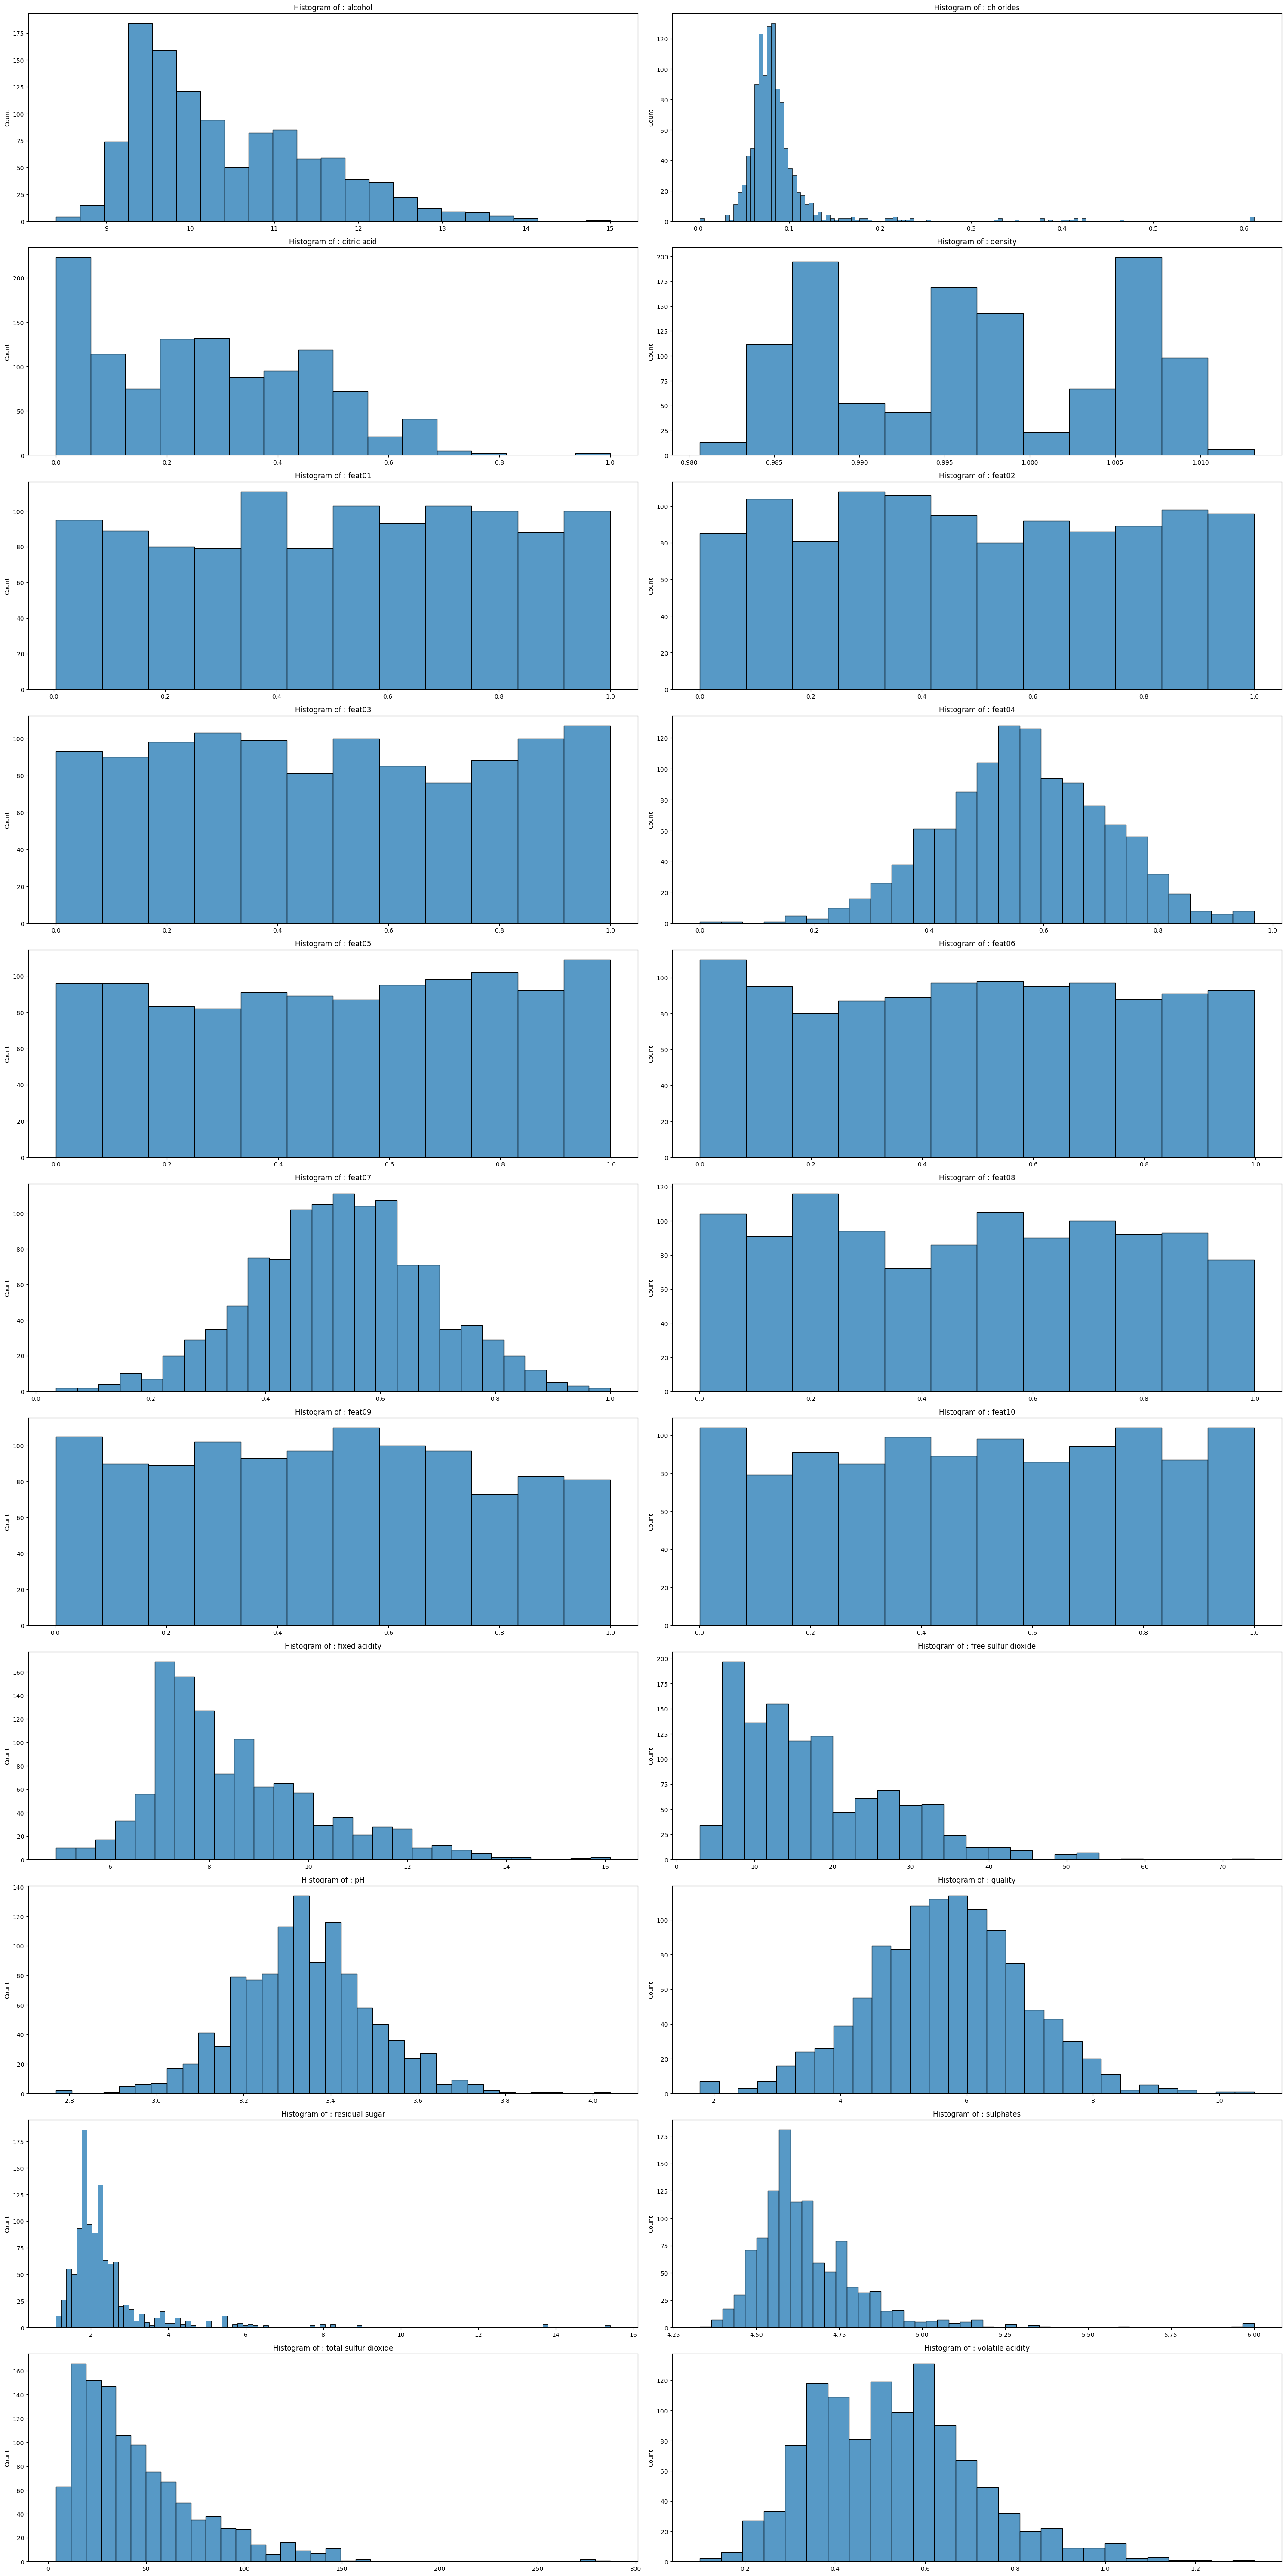

In [198]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(30, 60))
for i, ax in zip(df, axes.flat):
    sns.histplot(x=df[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.tight_layout()
plt.show()

Interestingly again, feat 04 and feat 07 stand out from additional variables because they have a distribution close to normal, while other additional features look like a random values uniformely distributed. Looking at remaining features, we can observe that most of them is right skewed. Good approach is to apply logarithmic transformations to decrease the impact of outliers. Also we can try to scale our data and find out which approach gives better results (tree-based modes do not require scaling, but it might be the case that our 10 additional features that have identical scale may influence the model)

Let's take a look at boxplots.

In [199]:
df_copy = df_train.copy()

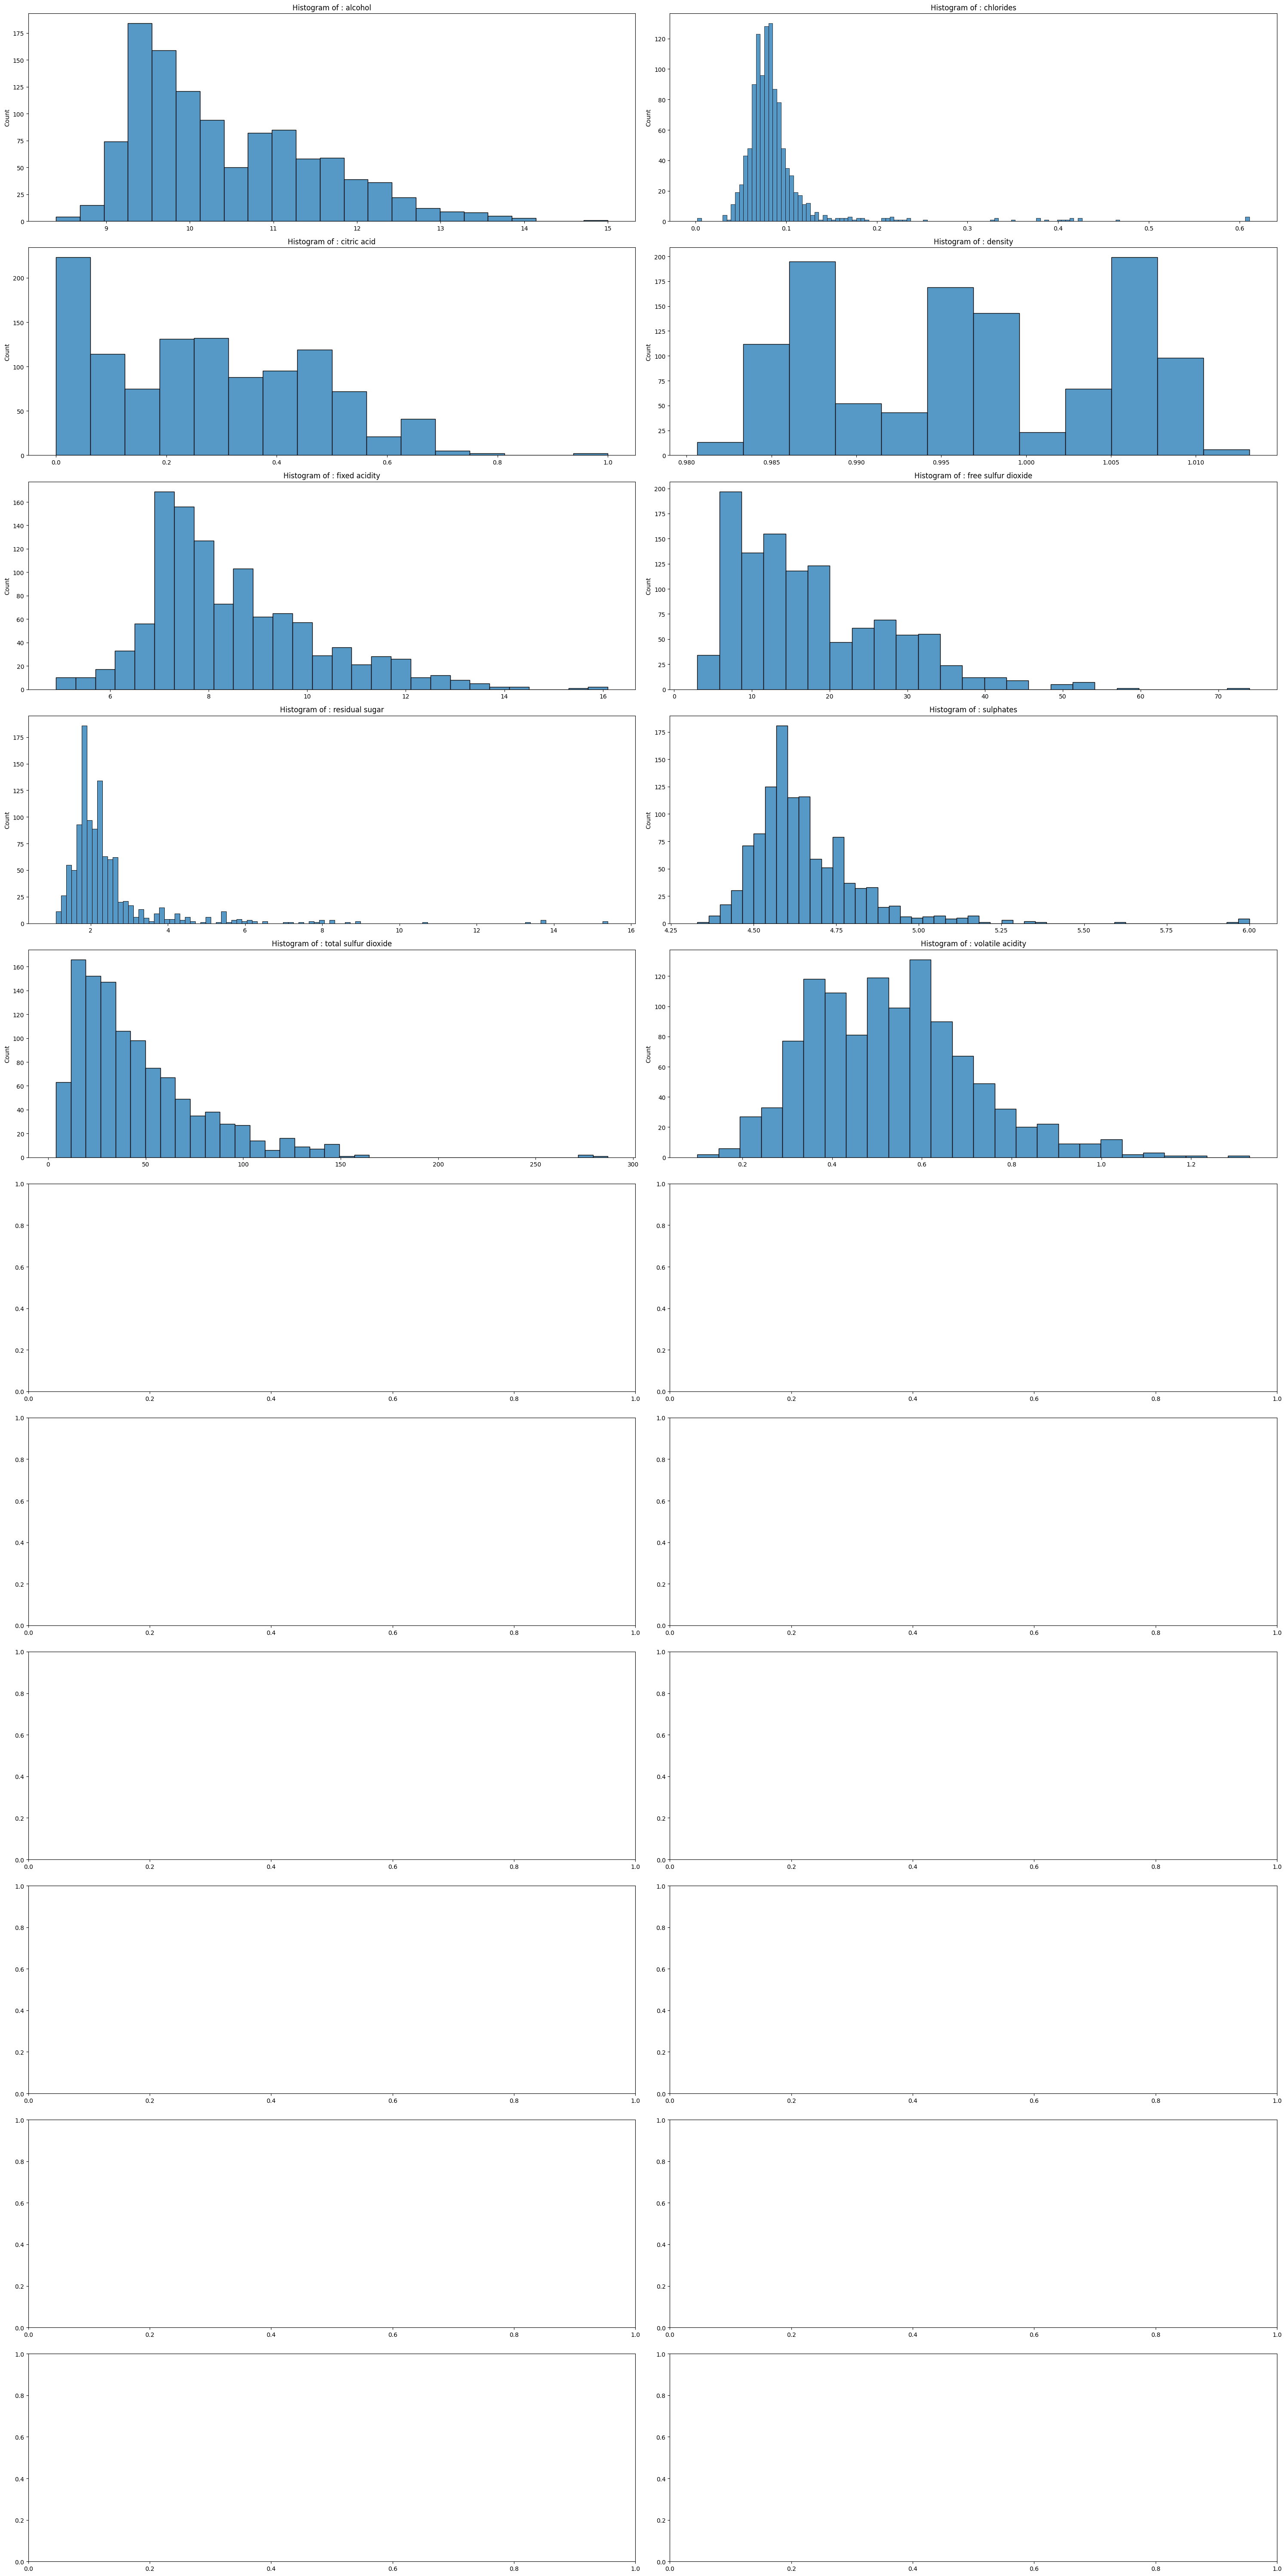

In [200]:
from sklearn.preprocessing import power_transform


log_transform_cols = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide','volatile acidity']
power_transform(df_copy[log_transform_cols], method='yeo-johnson', standardize=False)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 60))
for i, ax in zip(log_transform_cols, axes.flat):
    sns.histplot(x=df_copy[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.tight_layout()
plt.show()

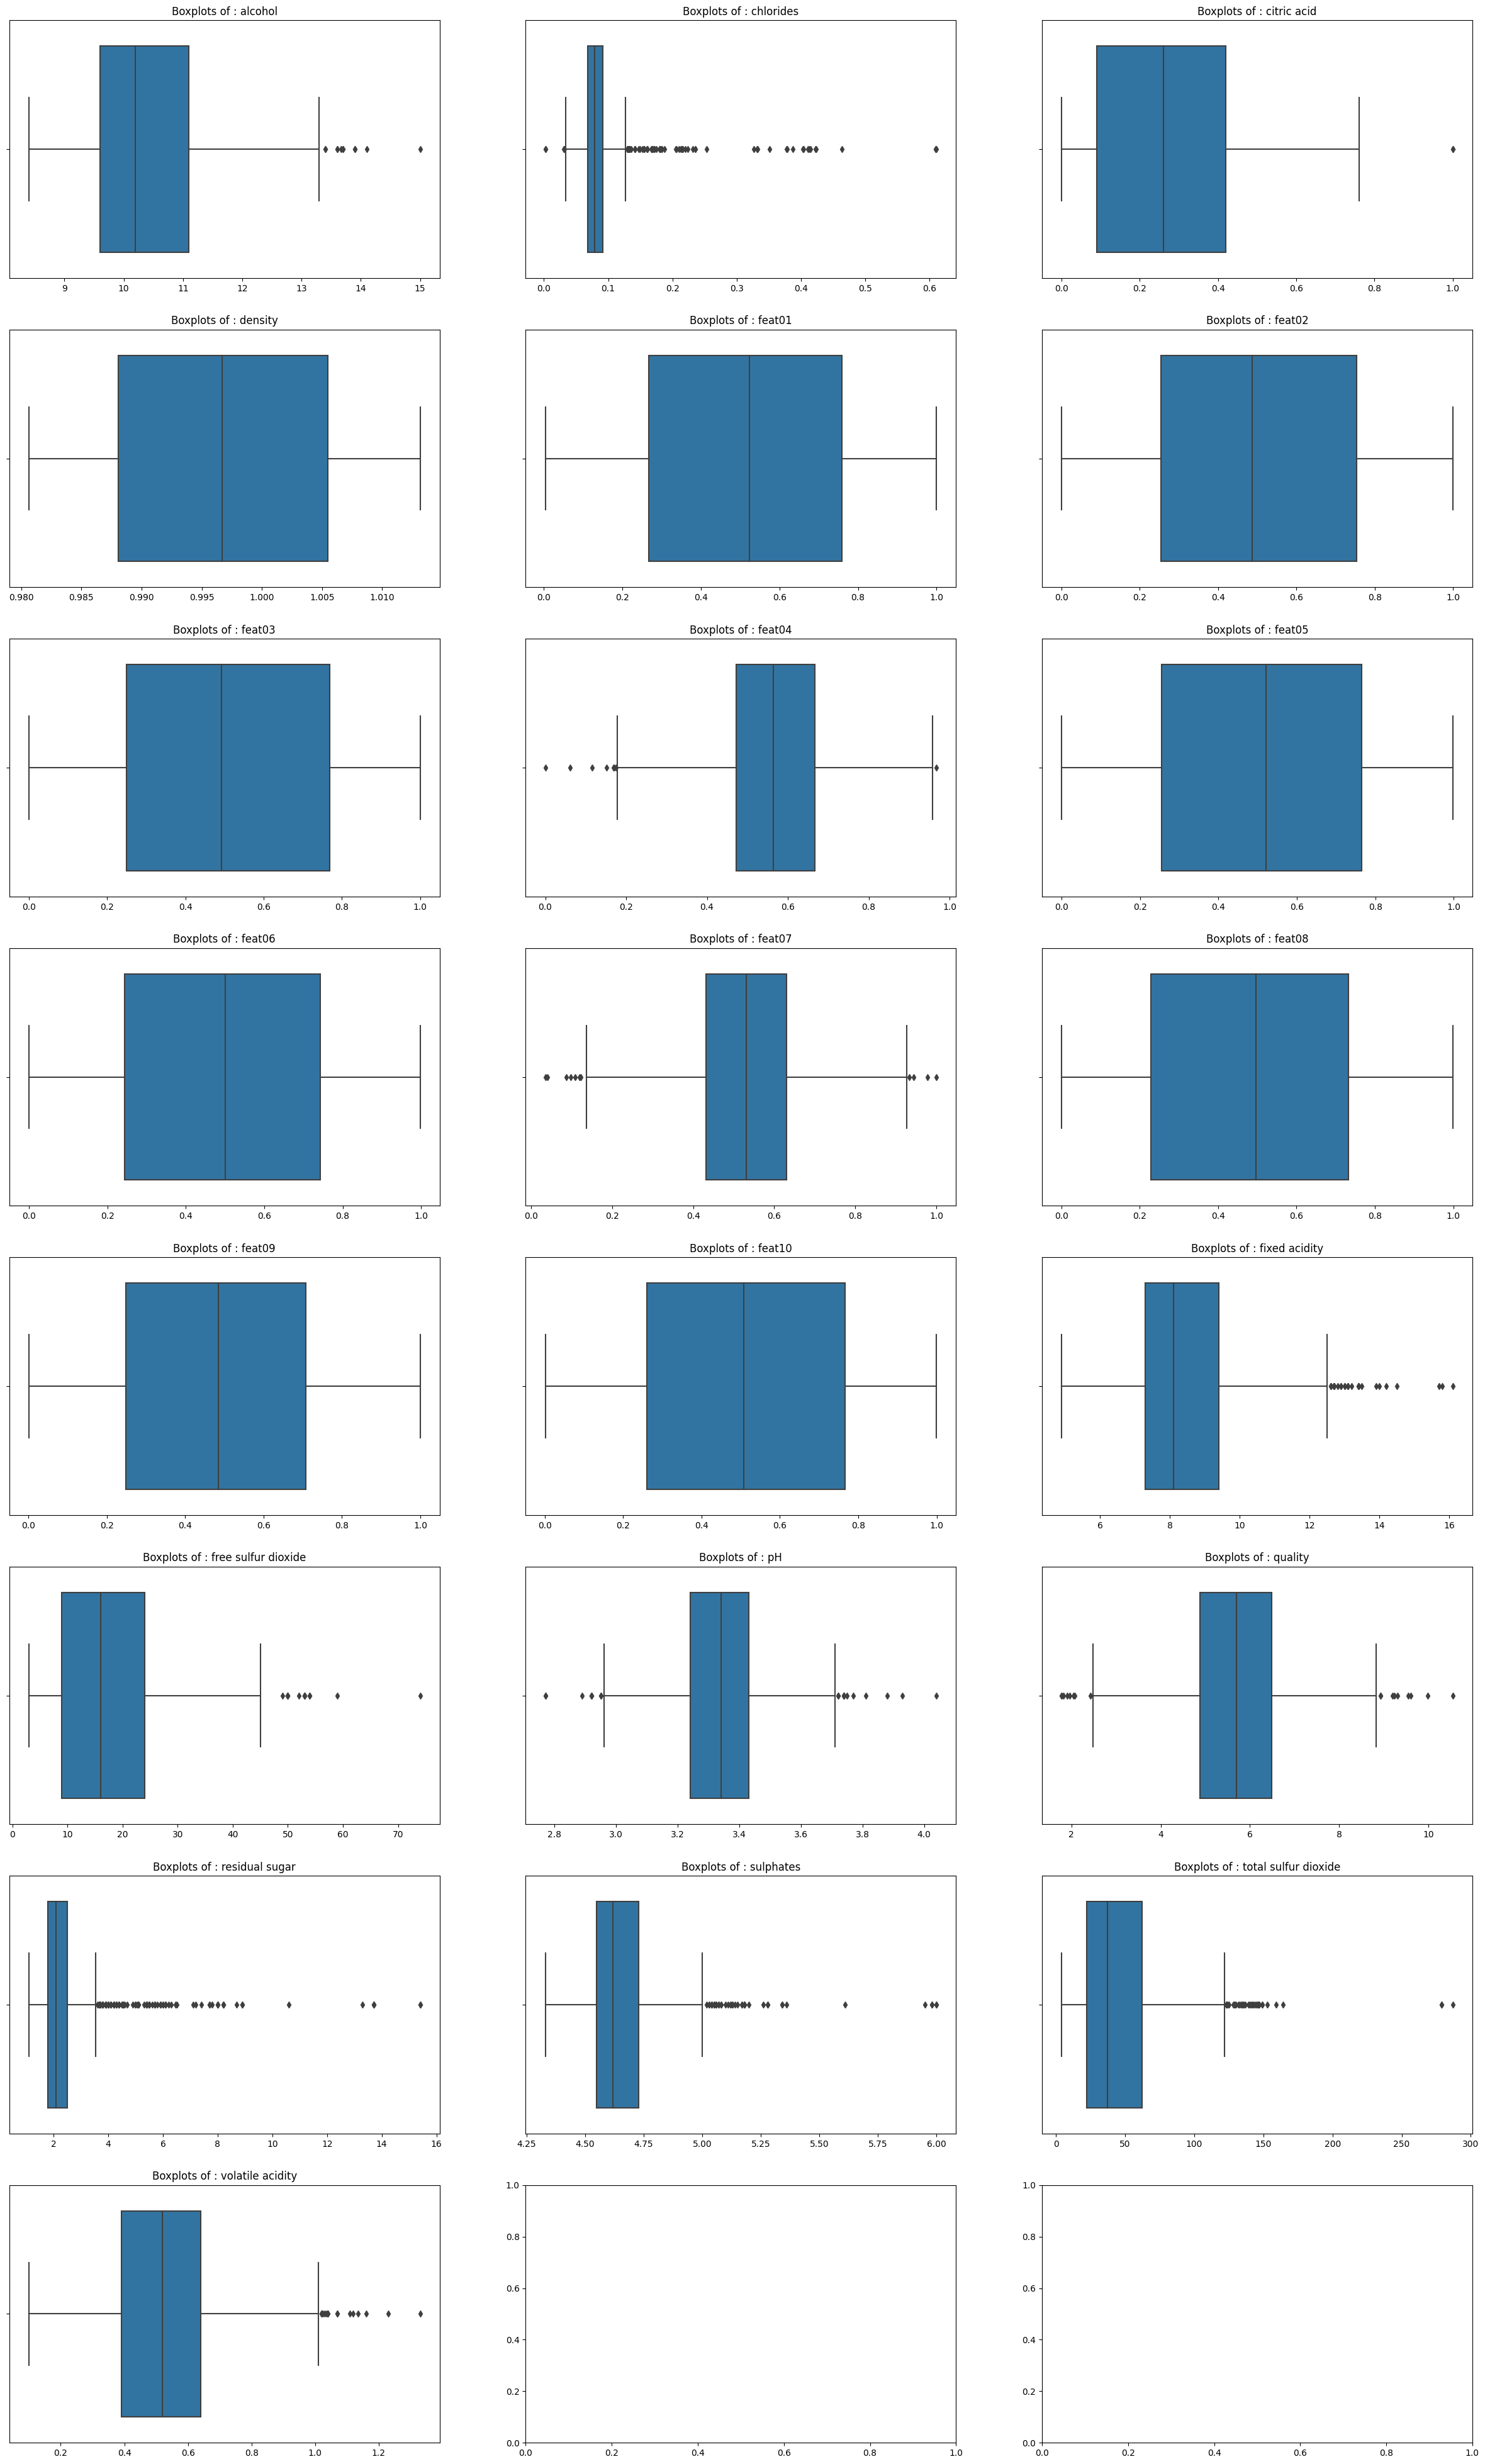

In [201]:
# Plotting boxplots for all continuous columns
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(30, 50))
for i, ax in zip(df, axes.flat):
    sns.boxplot(x=df[i], ax=ax).set(title=f"Boxplots of : {i}", xlabel="")
plt.show()

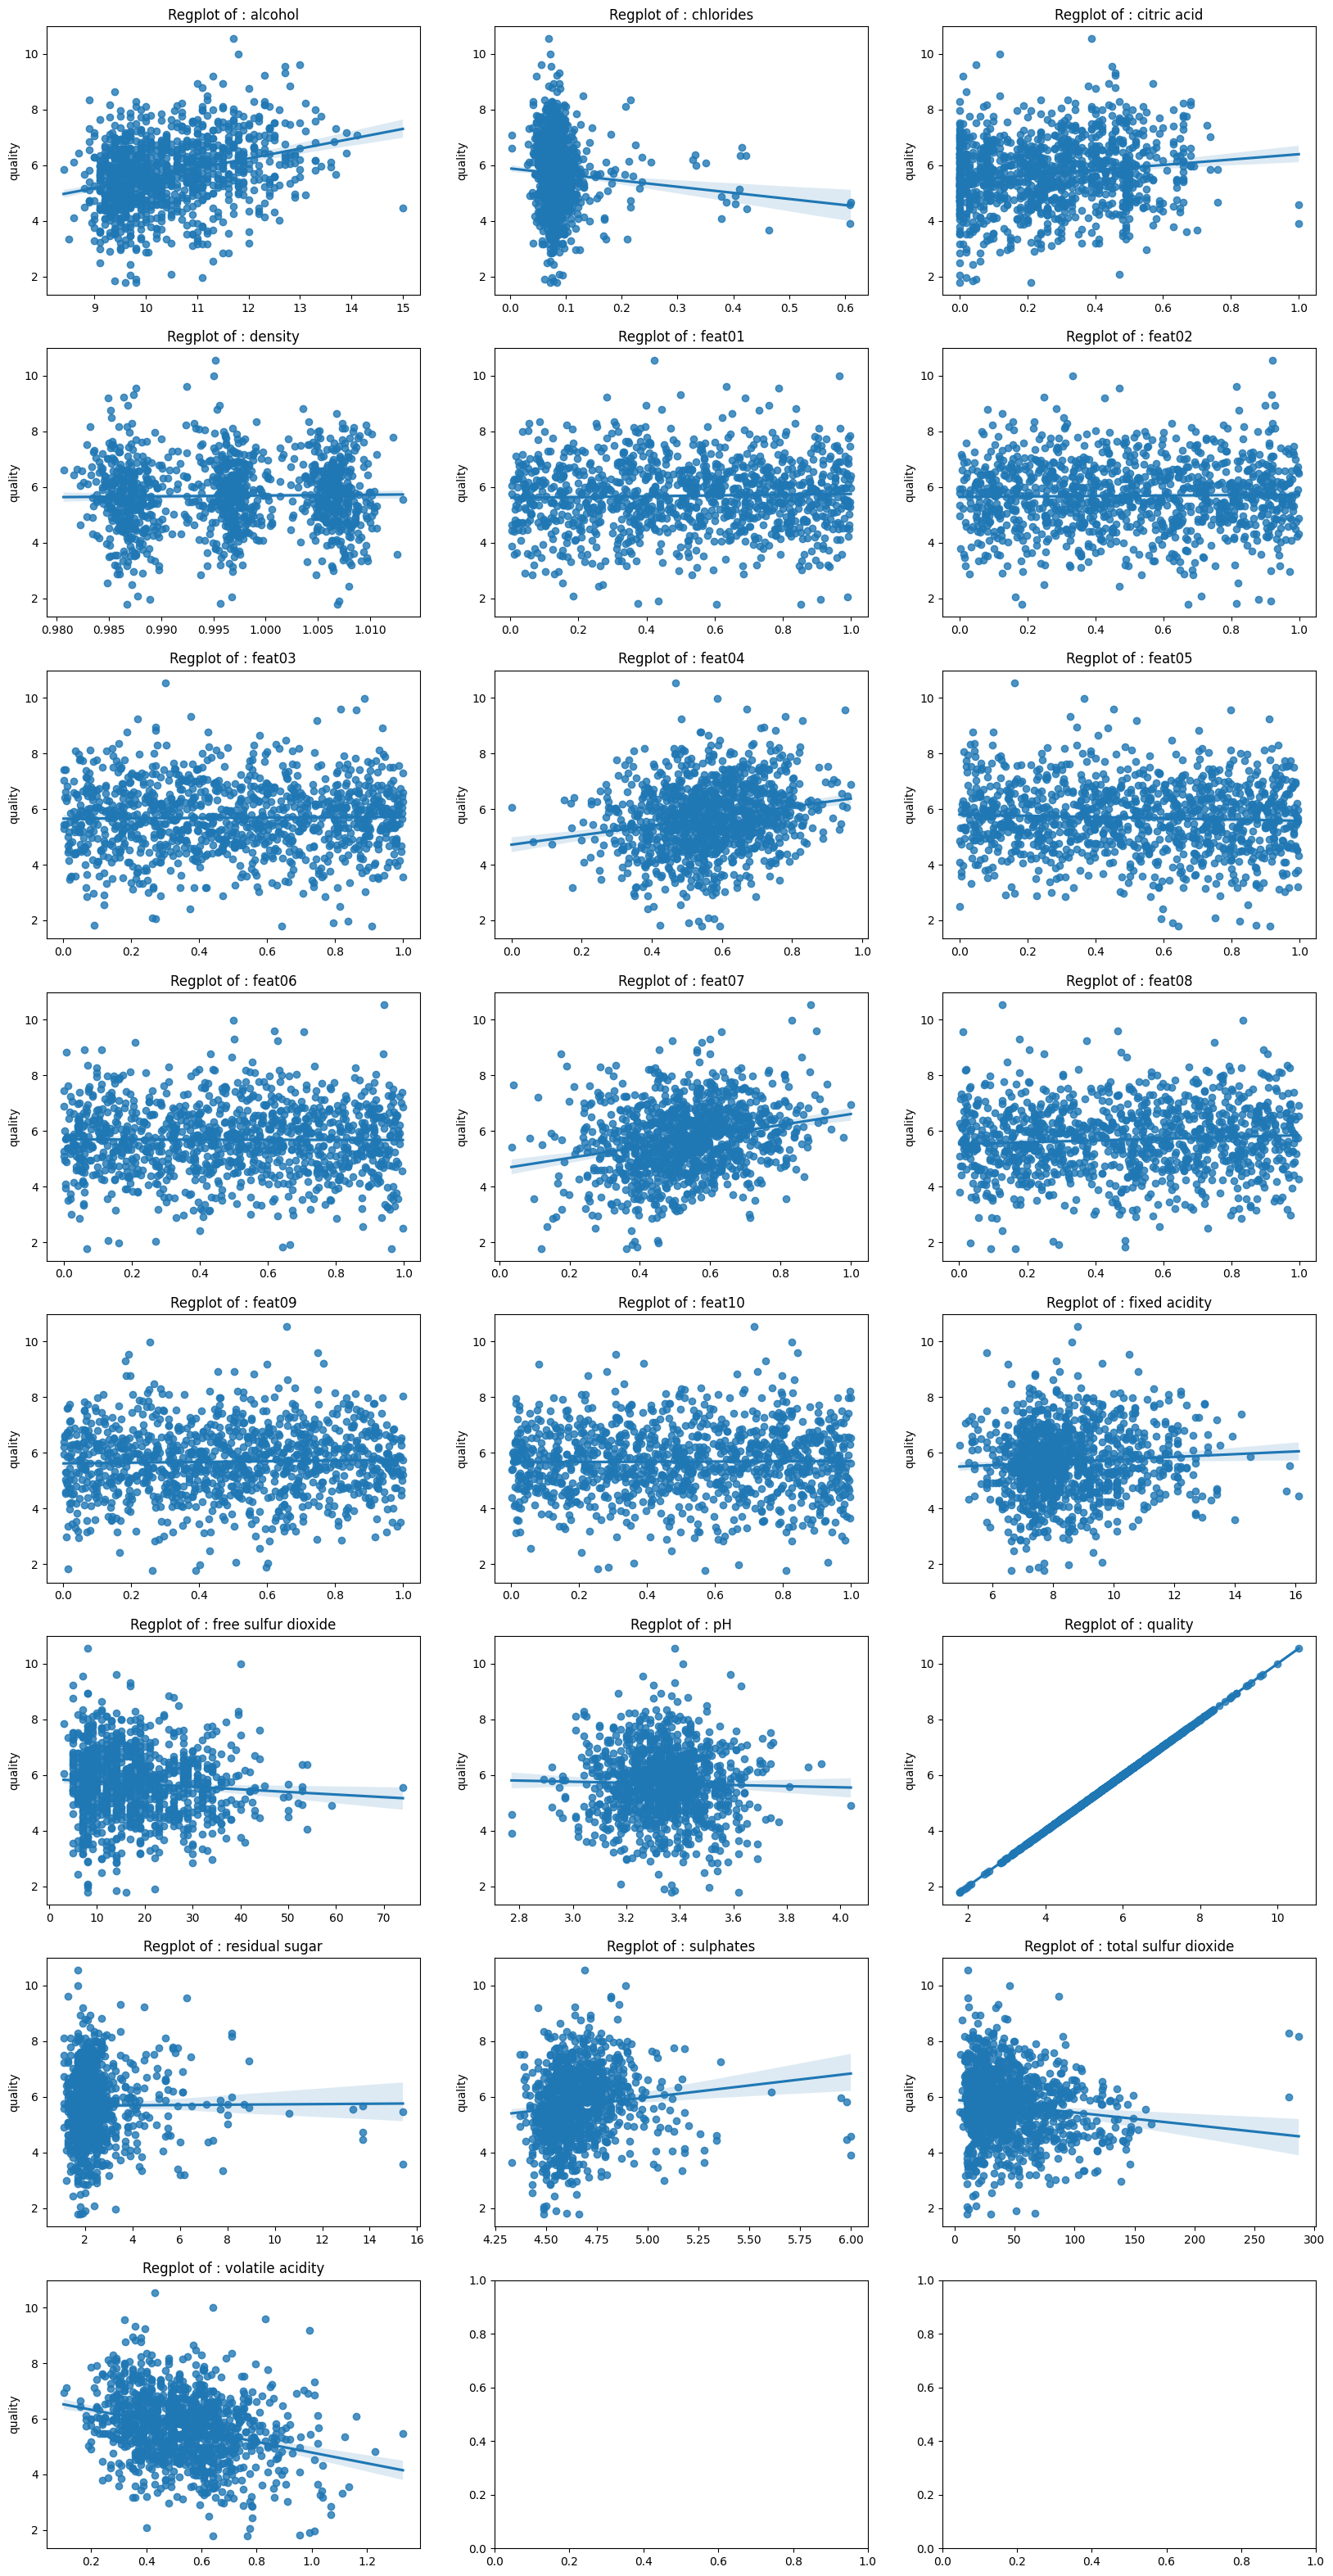

In [202]:
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(20, 40))
for i, ax in zip(df.columns, axes.flat):
    sns.regplot(x=df[i], y=df["quality"], ax=ax).set(title=f"Regplot of : {i}", xlabel="")
plt.show()

In [203]:
df_train.columns

Index(['id', 'alcohol', 'chlorides', 'citric acid', 'density', 'feat01',
       'feat02', 'feat03', 'feat04', 'feat05', 'feat06', 'feat07', 'feat08',
       'feat09', 'feat10', 'fixed acidity', 'free sulfur dioxide', 'pH',
       'quality', 'residual sugar', 'sulphates', 'total sulfur dioxide',
       'volatile acidity'],
      dtype='object')

In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import mstats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor

# Custom transformer that applies Winsorization
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=[0.01, 0.01]):
        self.limits = limits
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        self.lower_bound = np.percentile(X, self.limits[0] * 100)
        self.upper_bound = np.percentile(X, 100 - self.limits[1] * 100)
        return self

    def transform(self, X, y=None):
        X_winsorized = np.clip(X, self.lower_bound, self.upper_bound)
        return X_winsorized

# Create a FunctionTransformer wrapper for the Winsorizer
def winsorize_array(X, **kwargs):
    return Winsorizer(**kwargs).fit_transform(X)


# X_train_full = df_train.drop(['id', 'quality'], axis=1)
# y_train_full = df_train['quality']
# X_test = df_test.drop(['id', 'quality'], axis=1)
# y_test = df_test['quality']

X = data.drop(['id', 'quality', 'feat01', 'feat02',
       'feat03', 'feat05', 'feat06', 'feat09',
       'feat10'], axis=1)
y = data['quality']


# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=777)

# Columns to apply log transformation
log_transform_cols = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide','volatile acidity']
# Columns to apply scaling
scale_cols = X.columns  # Columns to apply scaling
# Columns to apply Winsorization
winsorize_cols = ['chlorides', 'residual sugar', 'sulphates']

# Create transformers for log transformation and scaling
log_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
scaler = StandardScaler()
winsorize_transformer = FunctionTransformer(winsorize_array, kw_args={'limits': [0.01, 0.01]})

# Define the ColumnTransformer, specifying the transformer and the columns it should be applied to
preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', log_transformer, log_transform_cols),
        ('scaling', scaler, scale_cols),
        ('winsorize', winsorize_transformer, winsorize_cols)
    ],
    remainder='passthrough'
)

# Models to ensemble

# Random Forest
rf = RandomForestRegressor(random_state=777)
xgb = XGBRegressor(random_state=777)
lgbm = LGBMRegressor(random_state=777)
gbr = GradientBoostingRegressor(random_state=777)
abr = AdaBoostRegressor(random_state=777)

stacking_regressor = VotingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf),
        ('lgbm', lgbm),
        ('gbr', gbr),
        ('abr', abr)
    ],
)

# Create the pipeline with the ColumnTransformer and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', stacking_regressor)
])

kf = KFold(n_splits=5, shuffle=True, random_state = 777)

MAPE = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring=MAPE)

cv_scores = -cv_scores

# Output the cross-validation results
print("Cross-validation MAPE scores:", cv_scores)
print("Mean MAPE:", cv_scores.mean())
print("Standard deviation of MAPE:", cv_scores.std())

Cross-validation MAPE scores: [0.16495142 0.17297717 0.15613259 0.16229038 0.17037407]
Mean MAPE: 0.165345126429742
Standard deviation of MAPE: 0.005964823872426319


In [17]:
X.columns

Index(['alcohol', 'chlorides', 'citric acid', 'density', 'feat01', 'feat02',
       'feat03', 'feat04', 'feat05', 'feat06', 'feat07', 'feat08', 'feat09',
       'feat10', 'fixed acidity', 'free sulfur dioxide', 'pH',
       'residual sugar', 'sulphates', 'total sulfur dioxide',
       'volatile acidity'],
      dtype='object')

In [23]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Define the Winsorizer class from previous discussions
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=[0.01, 0.01]):
        self.limits = limits
        self.lower_bound = None
        self.upper_bound = None

    def fit(self, X, y=None):
        self.lower_bound = np.percentile(X, self.limits[0] * 100)
        self.upper_bound = np.percentile(X, 100 - self.limits[1] * 100)
        return self

    def transform(self, X, y=None):
        X_winsorized = np.clip(X, self.lower_bound, self.upper_bound)
        return X_winsorized

# Instantiate the Winsorizer
winsorizer = Winsorizer(limits=[0.01, 0.01])

# Assume winsorize_cols are defined as the columns you want to apply Winsorizer to
winsorize_cols = ['chlorides', 'residual sugar', 'sulphates']

X_train_full = df_train.drop(['id', 'quality'], axis=1)
y_train_full = df_train['quality']
X_test = df_test.drop(['id', 'quality'], axis=1)
y_test = df_test['quality']

X = data.drop(['id', 'quality'], axis=1)
y = data['quality']

log_transform_cols = ['alcohol', 'chlorides', 'citric acid', 'density', 'fixed acidity', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide','volatile acidity']

kf = KFold(n_splits=5, random_state=777, shuffle=True)

MAPE_scores = {}  # Store MAPE scores for each regressor

# Define the log transformation and scaler
log_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
scaler = StandardScaler()

regressors = [('Random Forest', RandomForestRegressor(random_state=777)),
                                  ('Gradient Descent', GradientBoostingRegressor(random_state=777)),
                                  ('XGBoost', XGBRegressor(random_state=777)),
                                  ('LightGBM', LGBMRegressor(random_state=777)),
                                  ('AdaBoost', AdaBoostRegressor(random_state=777))]

feature_importances = {name: [] for name, _ in regressors}

for regressor_name, regressor in regressors:
    MAPE_scores[regressor_name] = []  # Initialize scores for the current regressor
    
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Apply log transformation and scaling to the training data
        X_train_log = X_train.copy()
        X_train_log[log_transform_cols] = log_transformer.fit_transform(X_train[log_transform_cols])
        X_train_scaled = scaler.fit_transform(X_train_log)

        # Apply the same transformations to the validation data
        X_val_log = X_val.copy()
        X_val_log[log_transform_cols] = log_transformer.transform(X_val[log_transform_cols])
        X_val_scaled = scaler.transform(X_val_log)

        # Train the current regressor
        regressor.fit(X_train_scaled, y_train)

        # Make predictions on the validation set
        y_val_pred = regressor.predict(X_val_scaled)

        # Calculate MAPE on the validation set
        mape = mean_absolute_percentage_error(y_val, y_val_pred)
        MAPE_scores[regressor_name].append(mape)

        if hasattr(regressor, 'feature_importances_'):
        # Store the feature importances
            feature_importances[regressor_name].append(regressor.feature_importances_)

# Calculate the mean and standard deviation of MAPE scores for each regressor
for regressor_name, scores in MAPE_scores.items():
    scores = np.array(scores)
    print(f"{regressor_name} MAPE scores for each fold:", scores)
    print(f"{regressor_name} Mean MAPE:", scores.mean())
    print(f"{regressor_name} Standard deviation of MAPE:", scores.std())

# After the cross-validation loop, print out the feature importances
for regressor_name, importances_list in feature_importances.items():
    if importances_list:  # If we have collected feature importances
        # Take the average of the feature importances from all folds
        avg_importances = np.mean(importances_list, axis=0)
        print(f"{regressor_name} average feature importances:")
        # Print the feature importances in a sorted order
        sorted_idx = np.argsort(avg_importances)[::-1]
        for idx in sorted_idx:
            print(f"{X_train.columns[idx]}: {avg_importances[idx]:.4f}")

Random Forest MAPE scores for each fold: [0.16962462 0.17699707 0.15946073 0.16333034 0.17373503]
Random Forest Mean MAPE: 0.16862955829340684
Random Forest Standard deviation of MAPE: 0.0064686995533154105
Gradient Descent MAPE scores for each fold: [0.16834721 0.1725162  0.15952461 0.16471164 0.17754078]
Gradient Descent Mean MAPE: 0.16852808761373242
Gradient Descent Standard deviation of MAPE: 0.006209576486934101
XGBoost MAPE scores for each fold: [0.18782108 0.18572262 0.17324228 0.18162392 0.17889136]
XGBoost Mean MAPE: 0.181460251603671
XGBoost Standard deviation of MAPE: 0.005153427878100024
LightGBM MAPE scores for each fold: [0.16907646 0.17989816 0.16111258 0.17258093 0.17387658]
LightGBM Mean MAPE: 0.17130894030698401
LightGBM Standard deviation of MAPE: 0.006179564701560168
AdaBoost MAPE scores for each fold: [0.17256737 0.18464607 0.15807865 0.17355376 0.17744993]
AdaBoost Mean MAPE: 0.17325915493185176
AdaBoost Standard deviation of MAPE: 0.008697557666232213
Random For